In [4]:
import mmf_setup;mmf_setup.nbinit()

<IPython.core.display.Javascript object>

# Overview

Here we demonstrate how gravitational wave data from a set of observations might constrain nuclear parameters.  These results were generated as follows:

1. A unified equation of state (EoS) was defined in terms of $N_p = 18$ parameters $\vect{p}$ as follows:
   * An outer crust is fixed by tabulated data. (No parameters.)
   * A compressible liquid drop model (CLDM) modeling spherical nuclei embedded in a gas of neutrons and electrons. (2 parameters)
   * A homogeneous interior with a homogeneous nuclear equation of state $\mathcal{E}(n_n, n_p)$ in conjunction with $\beta$-equilibrium. (13 parameters = 4 neutron matter parameters + 3 proton polaron parameters + 6 symmetric nuclear matter parameters)
   * A core characterized by the speed of sound (3 parameters).
2. The Tolman-Oppenheimer-Volkoff (TOV) equations were solved for non-rotating neutron stars, giving the neutron star masses $M(P_c, \vect{p})$, radii $R(P_c, \vect{p})$, second Love number $k_2(P_c, \vect{p})$ as functions of the central pressure $P_c$ and the 18 parameters $\vect{p}$.
3. Numerical derivatives of these functions were obtained using Richardson extrapolation.  These are tabulated for a set of $N_m$ masses spanning a range of neutron stars.  These derivatives are stored in dimensionless form:

   $$
     \frac{p_i}{M_j} \pdiff{M_j}{p_i} = p_j \pdiff \ln M_j.
   $$
   
4. Using a post-Newtonian analysis, these derivatives are used to obtain a set of Fisher information matrices $\mat{F}$ corresponding to the expected aLIGO signal sensitivity for all pairs of masses $m_1$ and $m_2$.  This is summarized in a $N_m\times N_m\times N_p\times N_p$ array where each entry $F[i, j,:,:]$ corresponds to the expected Fisher information matrix (FIM) obtained from the inspiral of a binary with masses $m_i$ and $m_j$ at a fiducial distance of $D_0=40$Mpc.  For an event at distance $D$, this must be weighted by a factor $(D_0/D)^2$.
5. From this set of FIM, a collective FIM can be obtained by summing over a sample population of binaries, weighed appropriately.
6. Nuclear uncertainties can be input directly with an information matrix:

   $$
     \mat{F}_{\text{nuclear}} = \mat{C}^{-1} 
     \approx \diag\left(\frac{1}{\sigma_{0}^{2}}, \frac{1}{\sigma_{1}^2}, \cdots\right)
   $$
   
   where $\sigma_i$ are the estimated 1-$\sigma$ relative Gaussian errors for the $i$th parameter $p_i$.  If parameter covariances are known, they can be introduced directly into the covariance matrix $\mat{C}$.  *(All of this analysis assumes that errors are small enough and Gaussian so that linear error analysis is a reasonable approximation.  As above, the tabulated FIM is scaled by the parameter values to be dimensionless, so the errors $\sigma_i$ represent the relative errors in parameter.)*
7. From this combined FIM, we perform various analyses such as a principal component analysis, looking at the largest eigenvalues and eigenvectors of $\mat{F}$, or computing the parameter covariance matrix $\mat{C} = \mat{F}^{-1}$.

The summary of this analysis for a sample equation of state roughly matching th$ ALF4 equation of state is presented in the following notebook:

* [`ALF4.ipynb`](ALF4.ipynb)

*(As additional equations of state are added, they will be analyzed in appropriately named notebooks.)*

# Equation of State

## Outer Crust

The outer crust is simply tabulated from results like those of Negele and Vautherin.  There are no parameters introduced here.

## CLDM

Once the nuclear equation of state $\mathcal{E}(n_n, n_p)$ is specified (see below), we make a unified transition from the outer crust to homogeneous matter using a compressible liquid drop model with the following components:

* A spherical nucleus in a spherical Wigner-Seitz cell.  (Energy density $\mathcal{E}(n_n^(i), n_p^(i))$ where $n_{n,p}^{i}$ are the average densities of the protons and neutrons inside the drop.)
* A surrounding neutron gas.  (Described by $\mathcal{E}(n_n^{o}, 0)$ where $n_n^{o}$ is the density of the neutron gas.)
* A homogeneous electron cloud.  (Described as a free Fermi gas, relativistic if needed, maintaining beta-equilibrium by establishing zero total charge.)
* A surface term.

The only parameters that enter this approximation are those describing the surface of the drop.   For this we use the approach of [Lattimer:1985] (also in [Steiner:2012a]) which is characterized in terms of the proton fraction $x = n_p/n_b$ and the isospin asymmetry $\beta = (n_n - n_p)/(n_n + n_p)$:

$$
  \sigma = \sigma_0\mathcal{B}(x), \qquad
  \mathcal{B}(x) = \frac{16+b}{x^{-3} + b + \frac{1}{(1-x)^3}}, \qquad
  C_{\mathrm{sym}} = \frac{\sigma_{\delta}}{\sigma_0} = \frac{96}{b+16}.
$$

This introduces two parameters `sigma_delta`$=\sigma_\delta$ and `sigma_0`$=\sigma_0$.  Note that for small asymmetries $x\approx 1$, $\beta \approx 0$, we have:

$$
  \sigma = \sigma_0\left(
    1 -
    \frac{C_{\mathrm{sym}}}
         {C_{\mathrm{sym}} - \frac{12}{2 - \frac{1}{(1+\beta)^3} - \frac{1}{(1-\beta)^3}}}
  \right)
  \approx
  \sigma_0\left(
    1 - C_{\mathrm{sym}}\beta^2 + \order(\beta^4)
  \right)
$$

Thus, we see that there are two independent parameters in this expression.  We fix the parameter $\sigma_0$ so that the CLDM matches the baryon density $n_B$ and energy-density $\mathcal{E}(n_B)$ at the upper end of the tabulated set of outer-crust data, ensuring a smooth transition (at most, second-order).

Following [Steiner:2012a], we introduce one more parameter `C_C`$=\mathcal{C}$ which is a suppression factor in the Coulomb energy intended to model the diffuseness of the proton distribution.  Finally, one could in principle vary the dimension `d_C`$=d$ of the Wigner-Seitz cell to allow for a crude estimate of pasta.  We have tried this in some cases, but generally leave $d=3$.

Once these parameters are fixed, and $\sigma_0$ is found, we must find the transition from a droplet to homogeneous matter by finding the point where the chemical potentials and pressures are equal.  This ensures that the transition from the CLDM to homogeneous matter remains convex.  To summarize, we have the following parameters:

**CLDM**
* `C_C`: Coulomb suppression factor $\mathcal{C}$.
* `d_C`: Dimension $d$ of the cells.  (Generally held fixed at $d=3$.)
* `sigma_delta`: Surface tension isospin dependence $\sigma_\delta$ [MeV/fm$^2$].

[Lattimer:1985]: http://dx.doi.org/10.1016/0375-9474(85)90006-5 (J.M. Lattimer, C.J. Pethick, D.G. Ravenhall, and D.Q. Lamb, "Physical properties of hot, dense matter: The general case", Nucl. Phys. A 432(3), 646 - 742 (1985) )

[Steiner:2012a]: http://dx.doi.org/10.1103/PhysRevC.85.055804 (Andrew W. Steiner, "Deep crustal heating in a multicomponent accreted neutron star crust", Phys. Rev. C 85, 055804 (2012) )

## Homogeneous Matter

As motivated by our work with fitting a nuclear energy density functional (NEDF) called SeaLL1:

* [Bulgac, Forbes, Jin, Perez, and Schunck: A Minimal Nuclear Energy Density Functional (accepted for PRC)](https://arxiv.org/abs/1708.08771)

we acknowledge that the connection between neutron matter and symmetric nuclear matter might be quite weak.  We thus base our parameterization of homogeneous matter on an expansion in proton fraction starting from pure neutron matter.  For pure neutron matter, we use the following energy per particle $E_n$ [MeV] as a function of neutron density $n_n$ [1/fm$^3$]:
   
$$
   E_n(n_n) = \frac{\mathcal{E}_{n}(n_n)}{n_n} 
   = m_nc^2 + a\left(\frac{n_n}{\bar{n}_0}\right)^{\alpha} + b\left(\frac{n_n}{\bar{n}_0}\right)^{\beta}
$$
     
where $m_n=939.565$MeV/$c^2$ is the neutron mass, $\bar{n}_0 = 0.16$/fm$^3$ is a constant (approximately the nucleon saturation density) and $a$, $b$, $\alpha$, and $\beta$ are four EoS parameters `a`, `alpha`, `b`, and `beta` in the code.

Adding a small proton fraction, we extend this using the following form:
     
\begin{align}
       \text{energy-per-particle}&& E_{np}(n_n, n_p) &= (1-x_p)E_n(n_n) + x_p\left(m_pc^2 + \Sigma^p(n_B)\right) 
       + \frac{(2\pi^2)^{2/3}}{2m^*}x_p^{5/3}n_B^{2/3} +x_p^2f_2(n_B) + x_p^3f_3(n_B)+\cdots\\
       &&n_B &= n_n + n_p, \qquad x_p = \frac{n_p}{n_B},&&\\
       \text{proton self-energy}&&\Sigma^p(n_B) &= \mu_p\frac{n_B}{\bar{n}_0}\frac{2u_p-\frac{n_B}{n_0}}{2u_p - 1}&&
\end{align}
     
where $m_p = 938.272$MeV/$c^2$ is the bare proton mass, and $m^*$ is the effective proton mass.  The properties of the proton polaron are characterized by the parameters $\mu_p$ [MeV], the proton chemical potential at $n_B = \bar{n}_0$ and $u_p$ which specifies at which $n_B = u_p\bar{n}_0$ the proton self-energy $\Sigma^p(n_B)$ reaches its minimum value as shown below:

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Demonstration of the parametrization of $\\Sigma^p(n_B)$')

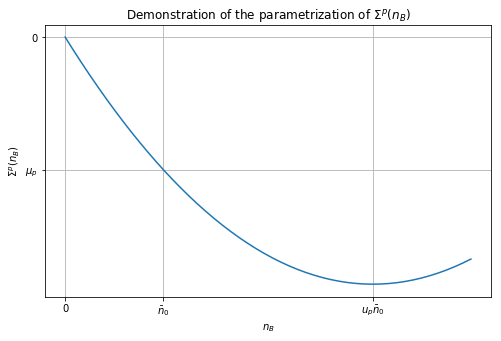

In [5]:
%pylab inline --no-import-all
import constants as u
n_0 = 0.16/u.fm**3
mu_p = -104.5*u.MeV
u_p = 3.136
n_B = np.linspace(0, (u_p+1)*n_0)
Sigma_p = mu_p*n_B/n_0*(2*u_p - n_B/n_0)/(2*u_p-1)
plt.figure(figsize=(8,5))
plt.plot(n_B, Sigma_p)
plt.grid(True)
plt.xticks([0, n_0, u_p*n_0], ['0', r'$\bar{n}_0$', r'$u_p\bar{n}_0$'])
plt.yticks([0, mu_p], ['0', r'$\mu_p$'])
plt.xlabel(r'$n_B$')
plt.ylabel(r'$\Sigma^p(n_B)$')
plt.title("Demonstration of the parametrization of $\Sigma^p(n_B)$")

The expansion above depends on the functions $f_2(n_B)$, $f_3(n_B)$ etc. which we fix by matching the energy-per-particle of symmetric nuclear matter:

$$
  E_{np}(n_n, n_p) = \varepsilon_0 + \frac{K_0}{2}(\delta\rho)^2 
  + \left((S_2 + L_2(\delta\rho) + \frac{K_2}{2}(\delta\rho)^2\right)\delta^2\\
  \delta = \frac{n_n-n_p}{n_B}, \qquad
  \delta\rho = \frac{n_B - n_0}{3n_0}.
$$

This introduces the following nuclear parameters: the saturation density $n_0$ [$1/$fm$^{3}$], the saturation energy-per-particle $\varepsilon_0$ [MeV], the symmetric incompressibility $K_0$ [MeV], and the following symmetry parameters at second order in the iso-spin asymmetry $\delta$: the symmetry energy $S_2$ [MeV], its slope $L_2$ [MeV] and its incompressibility $K_2$ [MeV].  Demanding that $E_{np}(n_n, n_p)$ match this expression order-by-order in the powers of $x_p$ up to order $x_p^5$ fixes the functions $f_2(n_B)$ through $f_5(n_B)$, completing the definition of the homogeneous equation of state.  To summarize, we have the following parameters:

**Nuclear Matter near Saturation**
* `n_0`: Saturation density $n_0$ [$1/$fm$^3$].
* `e_0`: Saturation energy density $\varepsilon_0$ [MeV].
* `K_0`: Symmetric incompressibility $K_0$ [MeV].
* `S_2`: Second-order symmetry energy $S_2$ [MeV].
* `L_2`: Second-order slope of the symmetry energy $L_2$ [MeV].
* `K_2`: Second-order incompressibility $K_2$ [MeV].

**Pure Neutron Matter**
* `a`: Coefficient $a$ [MeV] of the low-density polytrope.
* `alpha`: Power $\alpha$ of the low-density polytrope.
* `b`: Coefficient $b$ [MeV] of the high-density polytrope.
* `beta`: Power $\beta$ of the high-density polytrope.

**Proton Polaron**
* `mu_p0`: Proton chemical potential at the saturation density $\mu_p(\bar{n}_0)$ [MeV].
* `u_p`: Location $u_p\bar{n}_0$ of the minimum of the polaron dispersion.
* `m_eff_m_p`: Effective mass `m_p^*/m_p` of the proton in the polaron dispersion.

From these and the energy-density of a free lepton gas, we compute the equation of state by enforcing $\beta$-equilibrium through the condition of bulk charge neutrality and chemical equilibrium.

## Core

Finally, we require a parametrization of the inner core, which we characterize by the behaviour of the square of the speed-of-sound $C = c_s^2/c^2$.  We parametrize this as a polynomial starting at an energy density $\mathcal{E}_c$ up to a transition energy-density $\mathcal{E}_t$ as a function of the energy density $\mathcal{E} = n_BE_{np}(n_B)$.  Above $\mathcal{E}_t$ we simply adopt the asymptotic form $C_0 = 1/3$ predicted by quark matter.

In our code we specify that the polynomial form for $\mathcal{E}_c \leq \mathcal{E}\leq \mathcal{E}_t$ satisfy:

1. $C(\mathcal{E})$ is quadratic.
2. $C(\mathcal{E}_c) = C_c$ where $C_c$ is determined from the homogeneous equation of state.
3. $C(\mathcal{E}_\max) = C_\max$ is the maximum of the polynomial.  The two parameters $\mathcal{E}_\max$ and $C_\max$ are free.

These uniquely fix the equation of state of the core in terms of the following parameters:

**Core**
* `E_c`: Transition energy-density $\mathcal{E}_c$ [MeV/fm$^3$] at which we transition from the homogeneous equation of state to the core.
* `C_max`: Maximum value $C_\max$.
* `E_max`: Energy-density $\mathcal{E}_\max$ [MeV/fm$^3$] at which the polynomial obtains its maximum value.